<a href="https://colab.research.google.com/github/HJJoosse/ws-julia-nov22/blob/main/Workshop_Julia_Skyline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop Julia 

Following is a standard Julia template for installing Julia on Colab, please follow the instructions (we don't necessarily need a GPU for this workshop). However, if you feel like it, please feel free to use one.

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia UrlDownload Plots Distributions CSV DataFrames MLJ XGBoost MLJLinearModels MLJXGBoostInterface MLJModels"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2022-10-31 14:12:25 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package UrlDownload...
Installing Julia package Plots...
Installing Julia package Distributions...
Installing Julia package CSV...
Installing Julia package DataFrames...
Installing Julia package MLJ...
Installing Julia package XGBoost...
Installing Julia package MLJLinearModels...
Installing Julia package MLJXGBoostInterface...
Installing Julia package MLJModels...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  LD_PRELOAD = /usr/lib/x86_64-linux-gnu/libtcmalloc.so.4
  JULIA_NUM_THREADS = 2


### Using Julia

Let's first take a look at how Julia functions. Variable naming is very similar to R and Python. We can just assign a value to a certain name, and you're done.
We can, however, also use unicode! This latter is also very useful, as we can use the ∉ or ∈ variable for subsetting. But for this workshop, as we work in Colab, we will not be using this. 
Another neat item is list comprehensions, which work more or less the same as in Python. If else statements in these comprehensions work a bit differently.

In [ ]:
a = [1,2,3];
b = "Hi!"
c = [3,4,5]
d = [x for x in a if x in c] ### get all the items that are in a and c (basically the intersection)
e = [x-2 < 0 ? abs(x-2) : x-2 for x in a] ### if x-2 < 0 then abs(x-2) else x-2

3-element Vector{Int64}:
 1
 0
 1

When working with lists, arrays and other iterables, there are some differences compared to R and Python. For example, when trying to do an operation over an iterable, we use . in front of the operator, or behind the function call. For example, lets assume we have an array, and we want to select all the items above a certain value.

In [ ]:
using Distributions

d = Normal(0,1)
x = rand(d, 100)
x[x .< 0]

50-element Vector{Float64}:
 -0.4026044217331692
 -0.7579234775692633
 -0.7972294988994
 -0.7664814396566303
 -0.3771328531213684
 -0.13903512398461848
 -0.32440620960932315
 -0.9218759209954368
 -0.234877665918437
 -0.5137123051152007
 -0.34948578125480073
 -1.2468521122451373
 -0.7146517465875762
  ⋮
 -1.0256917532422523
 -0.23339669338082206
 -0.23705460547947882
 -1.5517569081705744
 -1.4512555781232714
 -1.4272022248506113
 -0.8441352051225514
 -0.9437904937903032
 -0.28175121867311026
 -0.8783907343429743
 -0.2836296162765255
 -0.5748288490754441

Or if we have a nested list, and we want a sum of each list within the list.

In [ ]:
x = [[2,3],[4,5]]
sum.(x)

2-element Vector{Int64}:
 5
 9

Matrices can be built quite easily. If we want a column or rowwise sum, we have to use the ```eachcol``` or ```eachrow``` command.


In [ ]:
A = [1 2;3 4]
sum(eachrow(A))

2-element Vector{Int64}:
 4
 6

One last syntactic thing I would like to discuss is the (...) syntax, which is the syntax for splatting in Julia. We might know splatting from Python where we can use * (e.g., ```print(*a)```, which would result in ```1 2 3``` instead of ```[1, 2, 3]```. In Julia we would do the following:

In [ ]:
a = [1,2,3];
println(a)
print(a...)


[1, 2, 3]
123

### Let's Get Started!

In this tutorial we will work with the [the Winconsin Breast Cancer Data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

Go ahead and download the data using the URLDownload package.

In [3]:
using UrlDownload, DataFrames, MLJ

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data";
feature_names = ["ID", "Class", "mean_radius", "mean_texture", "mean_perimeter",
 "mean_area", "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points",
  "mean_symmetry", "mean_fractal_dimension", "radius_error", "texture_error", "perimeter_error", "area_error",
   "smoothness_error", "compactness_error", "concavity_error", "concave_points_error", "symmetry_error", "fractal_dimension error",
    "worst_adius", "worst_texture", "worst_perimeter", "worst_area", "worst_smoothness", "worst_compactness", "worst_concavity",
     "worst_concave_points", "worst_symmetry", "worst_fractal_dimension"]
data = urldownload(url, true, format = :CSV, header = feature_names) |> DataFrame;

data = coerce(data,autotype(data));


We already see some more syntactic features of Julia in this code. 
First of all, when importing modules, there are  two ways of doing this: We can use ```using```, or ```import```. More information on the differences between the two can be found in [the documentation](https://docs.julialang.org/en/v1/manual/modules/#Standalone-using-and-import). TLDR: ```using``` is most commonly used, but ```import``` might be useful for extending on specific functions you import, as this is more limited with ```using```.

In the ``` urldownload  ``` call, we see the ``` :CSV ``` argument, which means that the data is loaded into the format as used in the "CSV" module. The colon in front of "CSV" is a replacement for quotation marks, meaning that this is a symbol.

Another syntactic feature that we see is in the ```|>``` operator. This might be familiar from other programming languages, and this is nothing more than a pipe. We could also have called ```DataFrame(urldownload(...))```, which would resulted in the same dataframe.

Lastly, we add a semicolon (;) to the end of each sentence, as Julia will output the last call automatically to the output (even if this call would result in a new object).

### Indexing rows and columns

DataFrame rows and columns are accessed similarly to R and Pandas/Numpy in Python. Important: when accessing Columns, you have to include ":" to select all rows (e.g., ```df[:,:column_of_interest]```). Columns can also be accessed by using ```df.column_of_interest``` (just like in Pandas). If you want to access more columns, you will have to add a list  ```df[:,[:col1,:col2]]. Another neat trick is to use the ```end``` operator. If we want to select row 2 untill the end we would simply use ```df[2:end,:]``` 

Try to play around, and select some individual or ranges of rows and columns based on numbers, or based on a certain condition. Also, try to get some summary statistics on some of the columns. Remember: dataframes usually have similar behaviour to matrices, so use the ```eachrow``` and ```eachcol``` functions, or select columns individually, and use the . operator for wrangling and conditions.


### Visualization
Next, let's inspect what we are working with! We can visualize the outcome (class), to get some intuition for the outcome and data. For this we use the ```Plots``` module. The neat thing about this module is that it is capable of using several backends for plotting. It has a default backend ```GR```, but it is also capable of using ```Plotly``` or ```PyPlot```, amongst others.

In this workshop we use the ```Gr``` backend, but feel free to play around with some other backends. A list can be found [here](https://docs.juliaplots.org/latest/backends/).
First, let's install the ```StatsPlots``` module, by using the Julia package manager (Pkg), to be able to plot data directly from a DataFrame.


In [56]:
using Pkg
Pkg.add("StatsPlots")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FFTW ────────────── v1.5.0
   Installed IntelOpenMP_jll ─── v2018.0.3+2
   Installed StatsPlots ──────── v0.15.4
   Installed Ratios ──────────── v0.4.3
   Installed OffsetArrays ────── v1.12.8
   Installed MKL_jll ─────────── v2022.2.0+0
   Installed DataValues ──────── v0.4.13
   Installed NearestNeighbors ── v0.4.12
   Installed KernelDensity ───── v0.6.5
   Installed Clustering ──────── v0.14.3
   Installed AbstractFFTs ────── v1.2.1
   Installed FFTW_jll ────────── v3.3.10+0
   Installed Adapt ───────────── v3.4.0
   Installed Widgets ─────────── v0.6.6
   Installed MultivariateStats ─ v0.10.0
   Installed Arpack_jll ──────── v3.5.1+1
   Installed TableOperations ─── v1.2.0
   Installed AxisAlgorithms ──── v1.0.1
   Installed Arpack ──────────── v0.5.3
   Installed WoodburyMatrices ── v0.5.5
   Installed Observables ─────── v0.5.2
   Installed Interpolations ──── v0.14.6
    U

We then import the ```Plots``` module, and call the ```GR``` backend with the ```gr()``` call. The last part is optional, as GR is the default backend. But if one would plotly or pyplot or other backends, this step would be how you set the backend. Then we a histogram of the outcome class.



In [57]:
using Plots, StatsPlots
gr()

Plots.GRBackend()

```Statsplot``` makes it possible to use the ```@df``` operator, which makes it easy to use a dataframe. The syntax would be: ```@df dataframe_name plot_type(:column1, :column2)```. But you can also use ```histogram(data[:,:Class])```


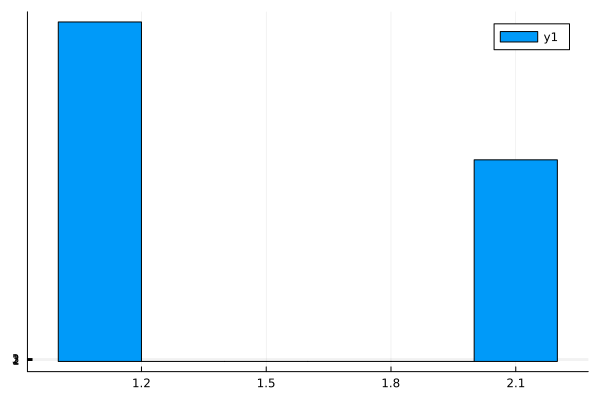

In [ ]:
@df data histogram(:Class)

There are of course other types of plots you could make. Let's try to make plot showing ```mean_compactness``` and ```mean_area``` against each other. Also try to make a density plot or histogram of the column of your choosing.

Hint:
- scatterplot: ```scatter()```
- lineplot: ```plot()```
- densityplot: ```density()```
- histogram: ```histogram()```

### Let's do some modelling

There are many algorithms available in Julia, which makes it a great language to do modelling in. However, it can seem the task very daunting, as we don't really know where to start. Luckily, there is a framework for that! Similarly to ```Plots```, the ```MLJ``` module is a framework that provides a toolbox and interface for performig a specific task, in this case machine learning. ```MLJ``` has a large library of algorithms that can be used in the MLJ workflow. It also includes the possibility of preprocessing data (e.g., scaling), or creating pipelines and model optimalisation approaches (e.g., training and evaluating a model using a nested CV approach). 

Let's first use ```unpack``` to select the X and y variables. We drop ID, but select all other features. For this we use the ```select!``` command. The ! means that the call is in place, so we don't have to explicitely define a new parameter (or rebind the result to X).

We can also just simply call ```y,X = unpack(data, ==(:Class),!=(:ID)``` 

In [10]:
y,X = unpack(data, ==(:Class))
select!(X,Not(:ID));


y = coerce(y,OrderedFactor);

We then use a StandardScaler, so that all means are 0, and all standard deviations are 1. For this we use ```Standardizer``` from the ```MLJModels``` module. There are some things going on:

- ```@load``` is a call from the MLJ module, which is used to load in models from other packages (we will use this later on also for ```XGBoost``` and ```MLJLinearModels```. We define the model we want to use, and we define the package where this model is found.

- We instantiate a standardiser (much like in Scikit-Learn)

- We then define a ```machine```, which is an object where a model and hyperparameters are stored in.

- We use ```fit!``` to fit the machine (in place), and then transform (from the MLJ package) to transform the data to the standardized data.

In [11]:
Standardizer = (@load Standardizer pkg=MLJModels verbosity=0)
stand1 = Standardizer();

mach_standardiser = machine(stand1,X)

X_transformed = MLJ.transform(fit!(mach_standardiser),X);


┌ Info: Training machine(Standardizer(features = Symbol[], …), …).
└ @ MLJBase /root/.julia/packages/MLJBase/6ooqv/src/machines.jl:496


Let's train and evaluate some models now. We want to predict y (class) using the standardised features. For ease, I already let you install XGBoost and MLJLinearModels. But of course, there are many more modules you can use (think about models such as Random Forests, Support Vector Machine, or your favourite Bayesian models).

Let's load in these two types of models, similar to the standardiser.

In [112]:
LR = (@load LogisticClassifier pkg=MLJLinearModels verbosity=0)
lr = LR();
XGB = (@load XGBoostClassifier pkg=XGBoost verbosity = 0)
xgb = XGB();

Next: we might want to optimize the hyperparameters in the model. For this, we can use the ```TunedModel``` function, and we can define some ranges for the hyperparameter we want to tune.

For example, for the Logistic Classifier, we can tune ```lambda```, which is the penalty, as used by LASSO.

In [91]:
range_lr = range(lr,:lambda,values = [0.001,0.01,0.1,1,10])
tm_lr = TunedModel(
    model = lr,
    range = range_lr,
    tuning = Grid(),
    resampling = StratifiedCV(nfolds = 5),
    measure=accuracy
);

We can then define a machine, and use this machine for hyperparameter evaluation.

Note that we define a ```StratifiedCV``` call twice (once in the ```TunedModel```, and once in the ```evaluate``` call, meaning that his approach is a nested cross-validation approach

In [108]:
m = machine(tm_lr,X_transformed,y)
e = evaluate!(m,resampling = StratifiedCV(nfolds = 5),measure = [accuracy,recall,npv,ppv,specificity])

Evaluating over 5 folds: 100%[=========================] Time: 0:00:00


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────────────┬──────────────┬─────────────┬─────────┬─────────────
│ measure                  │ operation    │ measurement │ 1.96*SE │ per_fold   ⋯
├──────────────────────────┼──────────────┼─────────────┼─────────┼─────────────
│ Accuracy()               │ predict_mode │ 0.977       │ 0.00772 │ [0.982, 0. ⋯
│ TruePositiveRate(        │ predict_mode │ 0.953       │ 0.0323  │ [0.977, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ NegativePredictiveValue( │ predict_mode │ 0.973       │ 0.0183  │ [0.986, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ Precision(               │ predict_mode │ 0.986       │ 0.0127  │ [0.977, 1. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ TrueNega

We can then look at a report for each outer fold, containing the best model, the history of the models that were tried (one for each value of lambda per fold), and then a measurement for accuracy in the 5 inner folds

In [94]:
e.report_per_fold[1]

(best_model = LogisticClassifier(lambda = 0.01, …),
 best_history_entry = (model = LogisticClassifier(lambda = 0.01, …),
                       measure = [Accuracy()],
                       measurement = [0.9824175824175825],
                       per_fold = [[1.0, 1.0, 0.9340659340659341, 0.978021978021978, 1.0]],),
 history = NamedTuple{(:model, :measure, :measurement, :per_fold), Tuple{MLJLinearModels.LogisticClassifier, Vector{Accuracy}, Vector{Float64}, Vector{Vector{Float64}}}}[(model = LogisticClassifier(lambda = 10.0, …), measure = [Accuracy()], measurement = [0.7362637362637363], per_fold = [[0.7032967032967032, 0.7362637362637363, 0.7912087912087912, 0.7142857142857143, 0.7362637362637363]]), (model = LogisticClassifier(lambda = 0.01, …), measure = [Accuracy()], measurement = [0.9824175824175825], per_fold = [[1.0, 1.0, 0.9340659340659341, 0.978021978021978, 1.0]]), (model = LogisticClassifier(lambda = 1.0, …), measure = [Accuracy()], measurement = [0.9384615384615385], per

In [95]:
e.report_per_fold[1].history

5-element Vector{NamedTuple{(:model, :measure, :measurement, :per_fold), Tuple{MLJLinearModels.LogisticClassifier, Vector{Accuracy}, Vector{Float64}, Vector{Vector{Float64}}}}}:
 (model = LogisticClassifier(lambda = 10.0, …), measure = [Accuracy()], measurement = [0.7362637362637363], per_fold = [[0.7032967032967032, 0.7362637362637363, 0.7912087912087912, 0.7142857142857143, 0.7362637362637363]])
 (model = LogisticClassifier(lambda = 0.01, …), measure = [Accuracy()], measurement = [0.9824175824175825], per_fold = [[1.0, 1.0, 0.9340659340659341, 0.978021978021978, 1.0]])
 (model = LogisticClassifier(lambda = 1.0, …), measure = [Accuracy()], measurement = [0.9384615384615385], per_fold = [[0.945054945054945, 0.978021978021978, 0.9120879120879121, 0.9230769230769231, 0.9340659340659341]])
 (model = LogisticClassifier(lambda = 0.001, …), measure = [Accuracy()], measurement = [0.9780219780219781], per_fold = [[1.0, 0.989010989010989, 0.9230769230769231, 0.978021978021978, 1.0]])
 (model = 

We already get some pretty good results! Let's see if we can outperform Logistic Regression with LASSO using XGBoost.

Here we also use the tuning parameter, which defines which hyperoptimization search is used. We can use ```Grid()``` for this, but considering the time this can take, we rather use ```RandomSearch()```. In this case, we decided to tune four different hyperparameters.

In [116]:
r1_xgb = range(xgb,:max_depth,lower=1,upper=10)
r2_xgb = range(xgb,:num_round,lower=10, upper=150)
r3_xgb = range(xgb,:gamma,lower = 0.1,upper = 0.9)
r4_xgb = range(xgb,:eta,lower = 0.01,upper = 0.2)

tm_xgb = TunedModel(
    model=xgb,
    resampling=StratifiedCV(nfolds = 5),
    measure=accuracy,
    ranges=[r1_xgb,r2_xgb,r3_xgb,r4_xgb],
    tuning=RandomSearch()
);



In [115]:
m = machine(tm_xgb, X_transformed, y)
e = evaluate!(m,resampling=StratifiedCV(nfolds=5),measure=[accuracy,recall,npv,ppv,specificity], verbosity=0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────────────┬──────────────┬─────────────┬─────────┬─────────────
│ measure                  │ operation    │ measurement │ 1.96*SE │ per_fold   ⋯
├──────────────────────────┼──────────────┼─────────────┼─────────┼─────────────
│ Accuracy()               │ predict_mode │ 0.965       │ 0.0161  │ [0.965, 0. ⋯
│ TruePositiveRate(        │ predict_mode │ 0.948       │ 0.0197  │ [0.953, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ NegativePredictiveValue( │ predict_mode │ 0.969       │ 0.0111  │ [0.972, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ Precision(               │ predict_mode │ 0.958       │ 0.0322  │ [0.953, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ TrueNega

In [117]:
m = machine(tm_xgb, X_transformed, y)
e = evaluate!(m,resampling=StratifiedCV(nfolds=5),measure=[accuracy,recall,npv,ppv,specificity], verbosity=0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌──────────────────────────┬──────────────┬─────────────┬─────────┬─────────────
│ measure                  │ operation    │ measurement │ 1.96*SE │ per_fold   ⋯
├──────────────────────────┼──────────────┼─────────────┼─────────┼─────────────
│ Accuracy()               │ predict_mode │ 0.963       │ 0.0166  │ [0.965, 0. ⋯
│ TruePositiveRate(        │ predict_mode │ 0.943       │ 0.0268  │ [0.953, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ NegativePredictiveValue( │ predict_mode │ 0.967       │ 0.015   │ [0.972, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ Precision(               │ predict_mode │ 0.957       │ 0.0249  │ [0.953, 0. ⋯
│   rev = nothing)         │              │             │         │            ⋯
│ TrueNega

Again, we can look at each fold, and get a report, including the tuning history (which models were tried in this outer fold).

In [100]:
e.report_per_fold[1]

(best_model = XGBoostClassifier(num_round = 50, …),
 best_history_entry = (model = XGBoostClassifier(num_round = 50, …),
                       measure = [Accuracy()],
                       measurement = [0.9692307692307693],
                       per_fold = [[0.9560439560439561, 0.989010989010989, 0.945054945054945, 0.9560439560439561, 1.0]],),
 history = NamedTuple{(:model, :measure, :measurement, :per_fold), Tuple{MLJXGBoostInterface.XGBoostClassifier, Vector{Accuracy}, Vector{Float64}, Vector{Vector{Float64}}}}[(model = XGBoostClassifier(num_round = 130, …), measure = [Accuracy()], measurement = [0.9604395604395604], per_fold = [[0.945054945054945, 0.978021978021978, 0.945054945054945, 0.9560439560439561, 0.978021978021978]]), (model = XGBoostClassifier(num_round = 96, …), measure = [Accuracy()], measurement = [0.9648351648351647], per_fold = [[0.945054945054945, 0.978021978021978, 0.945054945054945, 0.9560439560439561, 1.0]]), (model = XGBoostClassifier(num_round = 102, …), meas

In [105]:

e.report_per_fold[1].history

10-element Vector{NamedTuple{(:model, :measure, :measurement, :per_fold), Tuple{MLJXGBoostInterface.XGBoostClassifier, Vector{Accuracy}, Vector{Float64}, Vector{Vector{Float64}}}}}:
 (model = XGBoostClassifier(num_round = 130, …), measure = [Accuracy()], measurement = [0.9604395604395604], per_fold = [[0.945054945054945, 0.978021978021978, 0.945054945054945, 0.9560439560439561, 0.978021978021978]])
 (model = XGBoostClassifier(num_round = 96, …), measure = [Accuracy()], measurement = [0.9648351648351647], per_fold = [[0.945054945054945, 0.978021978021978, 0.945054945054945, 0.9560439560439561, 1.0]])
 (model = XGBoostClassifier(num_round = 102, …), measure = [Accuracy()], measurement = [0.9670329670329672], per_fold = [[0.9560439560439561, 0.989010989010989, 0.945054945054945, 0.9560439560439561, 0.989010989010989]])
 (model = XGBoostClassifier(num_round = 79, …), measure = [Accuracy()], measurement = [0.9582417582417582], per_fold = [[0.945054945054945, 0.967032967032967, 0.94505494505

In [106]:
e.report_per_fold[1].history[1].model

XGBoostClassifier(
  num_round = 130, 
  booster = "gbtree", 
  disable_default_eval_metric = 0, 
  eta = 0.08572808106781203, 
  gamma = 0.4842069182174844, 
  max_depth = 4, 
  min_child_weight = 1.0, 
  max_delta_step = 0.0, 
  subsample = 1.0, 
  colsample_bytree = 1.0, 
  colsample_bylevel = 1.0, 
  lambda = 1.0, 
  alpha = 0.0, 
  tree_method = "auto", 
  sketch_eps = 0.03, 
  scale_pos_weight = 1.0, 
  updater = "auto", 
  refresh_leaf = 1, 
  process_type = "default", 
  grow_policy = "depthwise", 
  max_leaves = 0, 
  max_bin = 256, 
  predictor = "cpu_predictor", 
  sample_type = "uniform", 
  normalize_type = "tree", 
  rate_drop = 0.0, 
  one_drop = 0, 
  skip_drop = 0.0, 
  feature_selector = "cyclic", 
  top_k = 0, 
  tweedie_variance_power = 1.5, 
  objective = "automatic", 
  base_score = 0.5, 
  eval_metric = "mlogloss", 
  seed = 0, 
  nthread = 1)

Go ahead and try different types of models! Use ```models(matching(X_transformed, y))``` to find out which models from what modules can actually be used on this data! Then use ```Pkg.add()``` to install the module, and ```@load``` to load the model into existence

In [29]:
models(matching(X_transformed, y))


51-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :abstract_type, :deep_properties, :docstring, :fit_data_scitype, :human_name, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :inverse_transform_scitype, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :predict_scitype, :prediction_type, :reporting_operations, :reports_feature_importances, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :transform_scitype, :input_scitype, :target_scitype, :output_scitype)}}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = B